## 保罗机械阱囚禁粒子运动1

In [2]:
# 导入必要的库
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

# 定义参数
h0 = 3.3e-2 # 马鞍面高度，单位m
r0 = 17.44e-2 # 马鞍面半径，单位m
g = 9.8 # 重力加速度，单位m/s^2
Omega = 44.6 # 200 / 60 * 2 * np.pi  旋转角速度，单位rad/s
m = 1e-6 # 粒子质量，单位kg
q = g * h0 / (r0**2 * Omega**2) # 无量纲参数

# 定义保罗势函数
def U(x, y):
    return m * g * h0 / r0**2 * (x**2 - y**2) * np.cos(2 * Omega * t) + 2 * x * y * np.sin(2 * Omega * t)

# 定义微分方程函数
def f(t, z):
    f = np.zeros(2, dtype=np.complex)
    f[0] = z[1]
    f[1] = -z[0] + 2 * q * np.conj(z[0]) * np.exp(1j * 2 * t)
    return f

def input1(z0,v0,t_max):
    sol = scipy.integrate.solve_ivp(f, [t_min, t_max], [z0, v0], t_eval=np.arange(t_min, t_max, dt))
    t = sol.t # 时间数组
    z = sol.y[0] # 解数组
    plot_trajectory(t, z)

# 定义初始条件
#z0 = 0.0001 + 0.0001j # 初始位置，单位m
#v0 = 0.00001 + 0.00001j # 初始速度，单位m/s

# 定义求解区间和步长
t_min = 0 # 起始时间，单位s
#t_max = 500 # 终止时间，单位s
dt = 0.1 # 时间步长，单位s

# 求解微分方程
#sol = scipy.integrate.solve_ivp(f, [t_min, t_max], [z0, v0], t_eval=np.arange(t_min, t_max, dt))

# 提取结果
#t = sol.t # 时间数组
#z = sol.y[0] # 解数组

# 定义绘图函数
def plot_trajectory(t, z):
    plt.figure(figsize=(8,8))
    plt.plot(z.real, z.imag, 'b-') # 绘制轨迹曲线
    plt.xlabel('x (m)') # 添加x轴标签
    plt.ylabel('y (m)') # 添加y轴标签
    plt.title('Particle trajectory in Paul trap') # 添加标题
    plt.grid() # 添加网格线
    plt.show() # 显示图像

# 调用绘图函数
#plot_trajectory(t, z)

/tmp/ipykernel_2984/1726657365.py:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.zeros(2, dtype=np.complex)


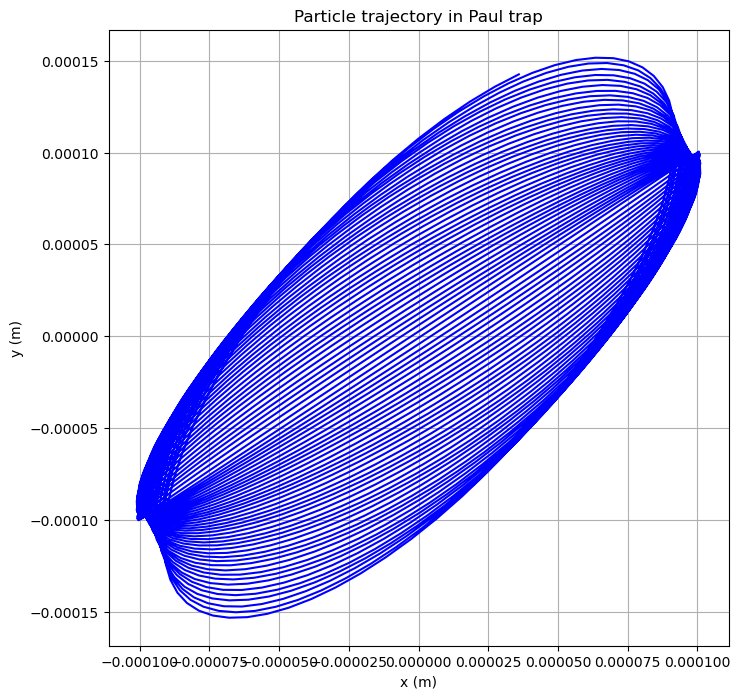

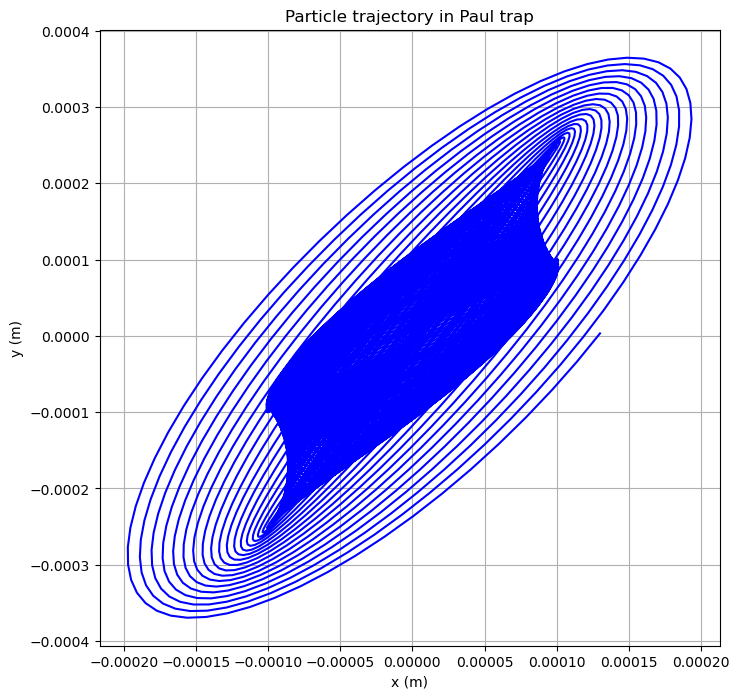

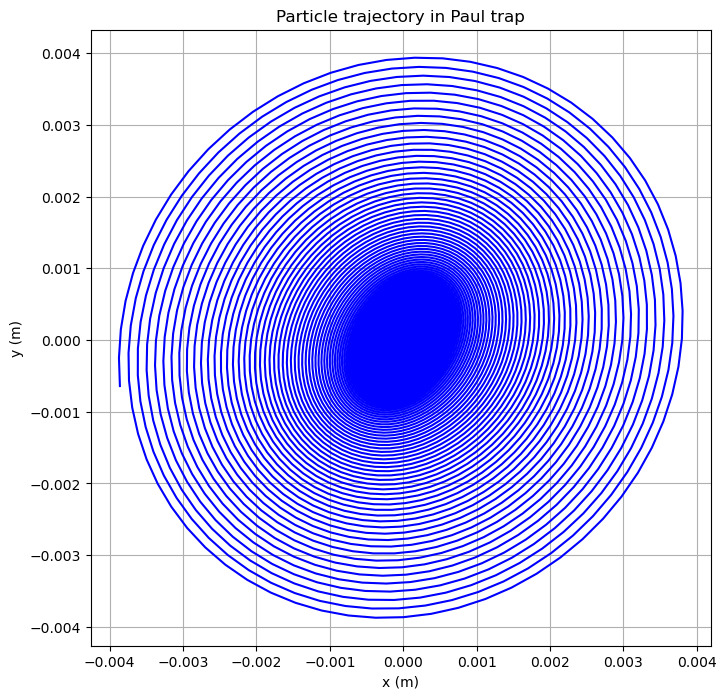

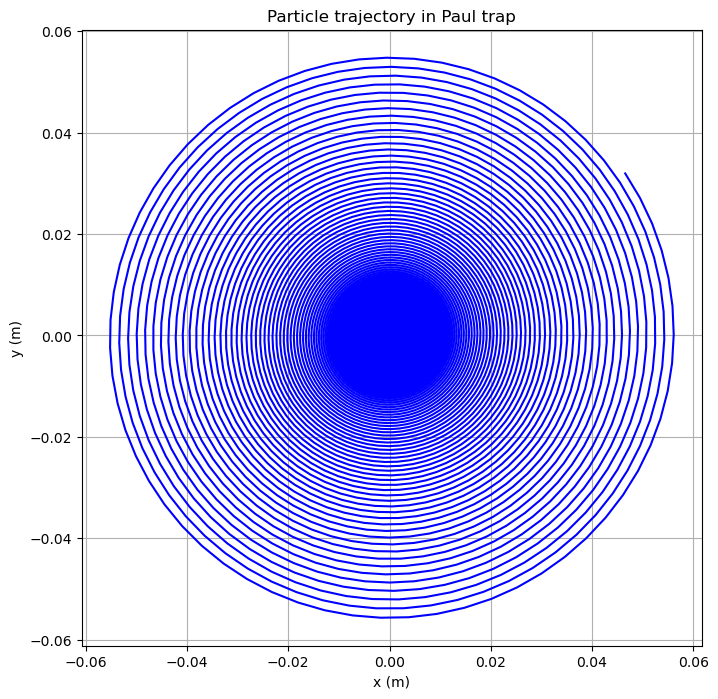

In [7]:
input1(0.0001 + 0.0001j,0.00001 + 0.00001j,250)
input1(0.0001 + 0.0001j,0.00001 + 0.00001j,500)
input1(0.0001 + 0.0001j,0.00001 + 0.00001j,1000)
input1(0.0001 + 0.0001j,0.00001 + 0.00001j,1500)

/tmp/ipykernel_2984/1726657365.py:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.zeros(2, dtype=np.complex)


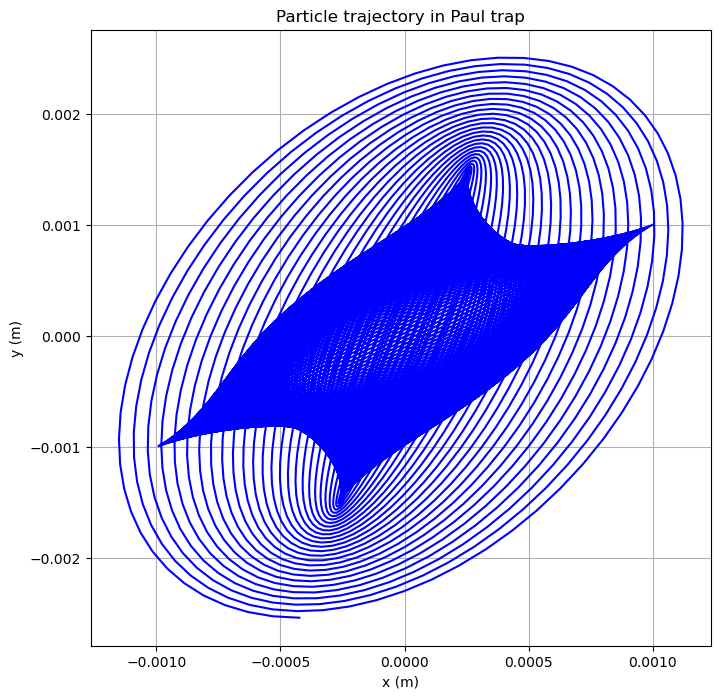

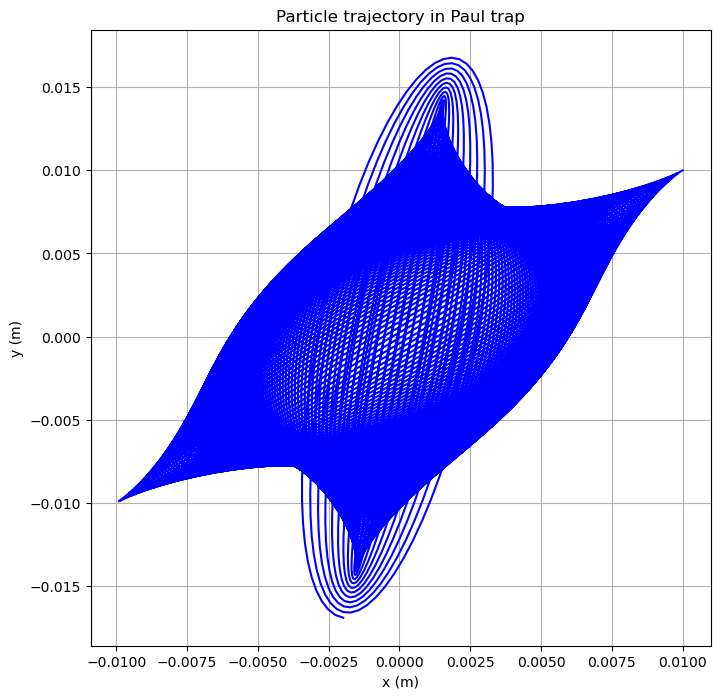

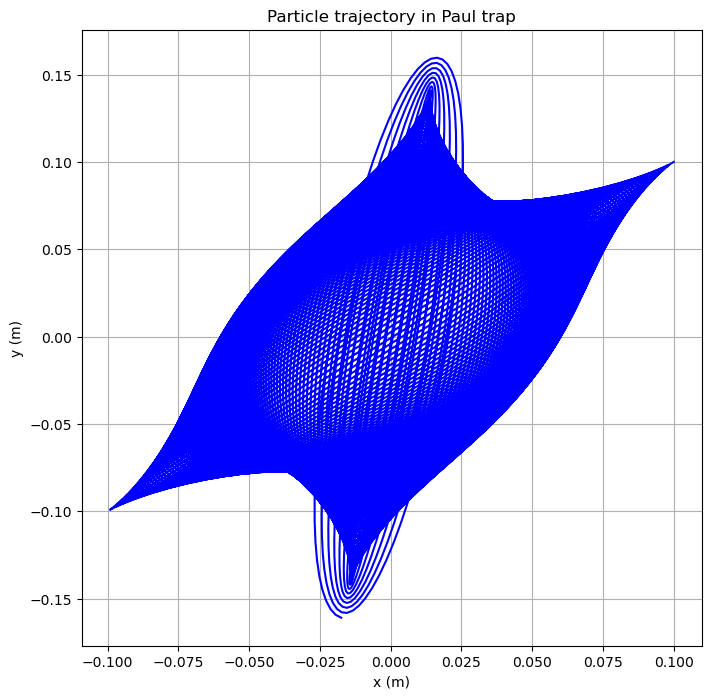

In [10]:
input1(0.001 + 0.001j,0.00001 + 0.00001j,750)
input1(0.01 + 0.01j,0.00001 + 0.00001j,750)
input1(0.1 + 0.1j,0.00001 + 0.00001j,750)


/tmp/ipykernel_2984/1726657365.py:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.zeros(2, dtype=np.complex)


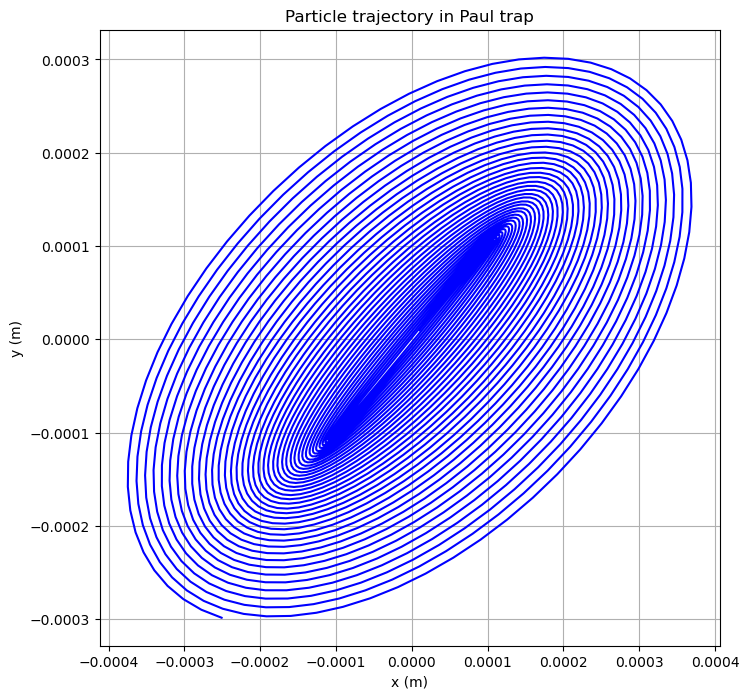

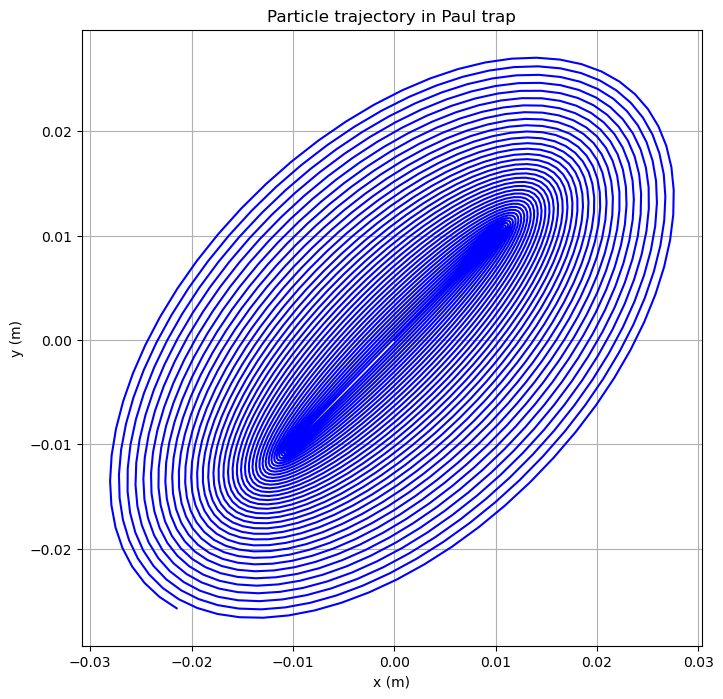

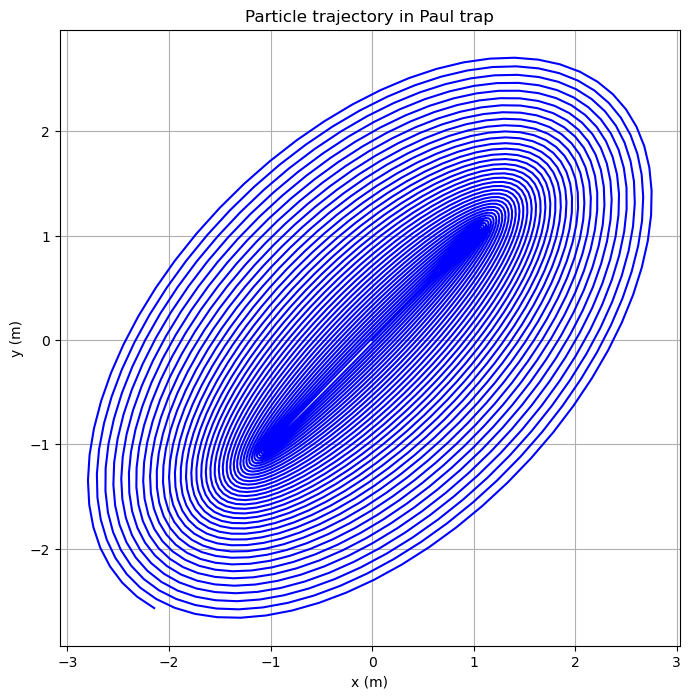

In [16]:
input1(0.00001 + 0.00001j,0.0001 + 0.0001j,250)
input1(0.00001 + 0.00001j,0.01 + 0.01j,250)
input1(0.00001 + 0.00001j,1 + 1j,250)


## animation

/tmp/ipykernel_428/2075136490.py:72: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)


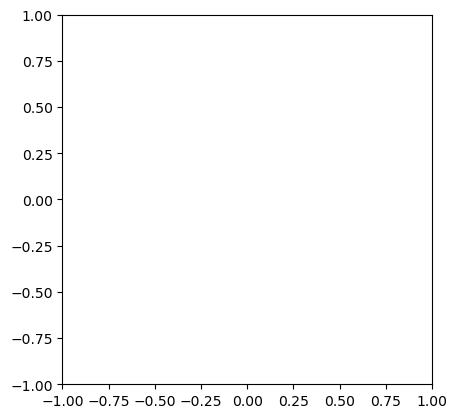

MovieWriter ffmpeg unavailable; using Pillow instead.


: 

In [3]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# 定义粒子类，包含位置、速度和角速度属性
class Particle:
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel

# 定义粒子模拟器类，包含粒子列表和演化方法
class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
    
    # 根据时间步长更新粒子的位置和速度
    def evolve(self, dt):
        timestep = 0.00001 # 设置一个很小的时间间隔
        nsteps = int(dt / timestep) # 计算需要迭代的次数
        
        for i in range(nsteps):
            for p in self.particles:
                # 计算粒子到原点的距离
                norm = (p.x ** 2 + p.y ** 2) ** 0.5
                # 计算粒子的运动方向（沿圆周切线）
                v_x = -p.y / norm
                v_y = p.x / norm
                
                # 计算粒子在x和y方向上的位移增量
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y
                
                # 更新粒子的位置
                p.x += d_x
                p.y += d_y

# 定义可视化函数，使用matplotlib.animation库绘制动态图像
def visualize(simulator):
    # 获取所有粒子的x和y坐标
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]
    
    # 创建一个图形对象和一个子图对象
    fig = plt.figure()
    ax = plt.subplot(111, aspect='equal')
    # 绘制所有粒子的初始位置，用红色圆点表示，并返回一个Line2D对象
    line, = ax.plot(X, Y, 'ro')
    
    # 设置x和y轴的范围
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    
    # 定义一个初始化函数，用于清空绘图区域，并返回一个包含Line2D对象的元组
    def init():
        line.set_data([], [])
        return line,
    
    # 定义一个动画函数，用于更新每一帧的图像，并返回一个包含Line2D对象的元组
    def animate(i):
        # 让模拟器演化0.01秒
        simulator.evolve(0.1)
        # 重新获取所有粒子的x和y坐标
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]
        # 更新Line2D对象的数据
        line.set_data(X, Y)
        return line,
    
    # 创建一个动画对象，指定图形对象，动画函数，初始化函数，更新频率和绘图模式
    anim = animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    # 显示动画
    plt.show()
    anim.save('demo1.gif')

# 定义一个测试函数，用于创建一些粒子和一个模拟器，并调用可视化函数
def test_visualize():
    # 创建三个粒子，分别位于(0.3, 0.5)，(0, -0.5)和(-0.1, -0.4)，角速度分别为1，-1和3
    particles = [Particle(0.3, 0.5, 1),
                 Particle(0.0, -0.5, -1),
                 Particle(-0.1, -0.4, 3)]
    
    # 创建一个模拟器，传入粒子列表
    simulator = ParticleSimulator(particles)
    
    # 调用可视化函数，传入模拟器
    visualize(simulator)

# 如果是主程序，调用测试函数
if __name__ == '__main__':
    test_visualize()
